In [54]:
from init_mnist import init, load
import numpy as np

np.random.seed(1)

In [55]:
# in case that dataset is missing or pickle is broken uncomment this
# init()

x_train, y_train, x_test, y_test = load()

# take first 1000 samples
x_train = x_train[0:1000]
y_train = y_train[0:1000]

# transform labels from [2] to [0,0,1,0,0,0,0,0,0,0]
OUT_CLASSES = 10

transformed_y_train = []

for y_label in y_train:
    zero = np.zeros((OUT_CLASSES,))
    zero[y_label] = 1
    transformed_y_train.append(zero)

y_train = transformed_y_train

transformed_y_test = []

for y_label in y_test:
    zero = np.zeros((OUT_CLASSES,))
    zero[y_label] = 1
    transformed_y_test.append(zero)

y_test = transformed_y_test

# normalize input, avoid divergence
x_train = x_train / 255
x_test = x_test / 255

In [56]:
x_train[0].shape

(784,)

In [57]:
def relu(x):
    return (x > 0) * x

def relu_deriv(x):
    return x > 0

def predict(input_data, weights):
    # input dot weights between 0 and 1 layer
    # (1, 783) dot (738, 30) -> (1, 30)
    layer_1 = relu(np.dot(input_data, weights[0]))
    # output from layer 1 dot weights between 1 and 2 layer
    # (1, 30) dot (30, 10) -> (1, 10)
    layer_2 = np.dot(layer_1, weights[1])
    
    return layer_1, layer_2

# calculate accuracy
def accuracy(x_train, y_train, weights):
    match = 0
    for input_, label in zip(x_train, y_train):
        _, output = predict(input_, weights)
        
        if np.argmax(output) == np.argmax(label):
            match += 1

    return match / len(x_train)

In [58]:
# input layer
LAYER_0_NODES = x_train.shape[1]
# hidden layer
LAYER_1_NODES = 100
# output layer
LAYER_2_NODES = 10

# init weights (-0.1 to 0.1 range)
init_weights_0_1 = 0.2 * np.random.rand(LAYER_0_NODES, LAYER_1_NODES) - 0.1
init_weights_1_2 = 0.2 * np.random.rand(LAYER_1_NODES, LAYER_2_NODES) - 0.1

# random prediction
_ , result = predict(x_train[0], (init_weights_0_1, init_weights_1_2))
result

array([-0.00137727, -0.07026133,  0.07340835, -0.03961604, -0.31971186,
       -0.16583885,  0.21613118, -0.06522297, -0.05437205, -0.19227169])

In [59]:
def train(train_data, train_labels, init_weights, alpha, number_of_epoch):
    weights_0_1 = init_weights[0]
    weights_1_2 = init_weights[1]
    
    print("Epoch:", end = '')
    
    acc_history = [accuracy(x_train, y_train, (weights_0_1, weights_1_2))]
    test_history = [accuracy(x_test, y_test, (weights_0_1, weights_1_2))]
    
    for i in range(number_of_epoch):
        print(".", end = '')
        
        for input_data, expected_data in zip(train_data, train_labels):
            # get prediction
            layer_1, layer_2 = predict(input_data, (weights_0_1, weights_1_2))
            
            # dropout layer_1
            dropout_mask = np.random.randint(2, size=len(layer_1))
            layer_1 *= dropout_mask * 2
            
            # delta between prediction and expected result
            # (1, 10) - (1, 10) -> (1, 10)
            delta_layer_2 = layer_2 - expected_data
            # delta on hidden layer, multiply output delta by weights between 1 and 2 layer
            # (1, 10) dot (10, 30) * (1, 30) -> (1, 30)
            delta_layer_1 = delta_layer_2.dot(weights_1_2.T) * relu_deriv(layer_1)
            
            # apply dropout to delta
            delta_layer_1 *= dropout_mask
            
            # do the learning (backpropagation)
            # alpha * (30, 1) dot (1, 10) -> (30, 10)
            weights_1_2 = weights_1_2 - alpha * np.atleast_2d(layer_1).T.dot(np.atleast_2d(delta_layer_2))
            # alpha * (783, 1) dot (1, 30) -> (783, 30)
            weights_0_1 = weights_0_1 - alpha * np.atleast_2d(input_data).T.dot(np.atleast_2d(delta_layer_1))
    
        acc_history.append(accuracy(x_train, y_train, (weights_0_1, weights_1_2)))
        test_history.append(accuracy(x_test, y_test, (weights_0_1, weights_1_2)))
        print(test_history[-1])
#       Early stopping
#         if (acc_history[i+1] - acc_history[i]) < 0.0001:
#             print("Early stopping!")
#             break

    return (weights_0_1, weights_1_2), acc_history, test_history

In [60]:
weights, acc_history, test_history = train(x_train, y_train, (init_weights_0_1, init_weights_1_2), 0.005, 300)

(acc_history[-1], test_history[-1])

Epoch:.0.656
.0.7279
.0.758
.0.7874
.0.8103
.0.8258
.0.8358
.0.8421
.0.8491
.0.8526
.0.856
.0.8575
.0.8605
.0.8645
.0.8654
.0.8669
.0.8693
.0.8724
.0.8746
.0.8747
.0.8769
.0.8782
.0.8785
.0.8808
.0.878
.0.8763
.0.876
.0.8788
.0.8786
.0.8804
.0.8822
.0.8817
.0.88
.0.8806
.0.8833
.0.8808
.0.882
.0.881
.0.881
.0.8791
.0.8842
.0.8823
.0.8832
.0.8823
.0.8822
.0.8845
.0.8827
.0.8828
.0.8832
.0.883
.0.8813
.0.8825
.0.88
.0.883
.0.8818
.0.8836
.0.8817
.0.8837
.0.8804
.0.8793
.0.8812
.0.8812
.0.8802
.0.8818
.0.8806
.0.8828
.0.8789
.0.8827
.0.8815
.0.8791
.0.8799
.0.8802
.0.8807
.0.8781
.0.88
.0.8807
.0.8795
.0.8804
.0.8781
.0.8803
.0.8788
.0.8785
.0.8779
.0.8789
.0.8802
.0.8777
.0.8778
.0.8791
.0.8786
.0.8787
.0.881
.0.8787
.0.879
.0.8782
.0.8776
.0.8794
.0.8777
.0.8776
.0.8769
.0.8779
.0.8788
.0.8786
.0.879
.0.8784
.0.8775
.0.8774
.0.8775
.0.8763
.0.8778
.0.8792
.0.8776
.0.8801
.0.8763
.0.8768
.0.8775
.0.8765
.0.8761
.0.8768
.0.8764
.0.8773
.0.8755
.0.8752
.0.876
.0.8759
.0.876
.0.8746
.0.8758

(1.0, 0.8687)

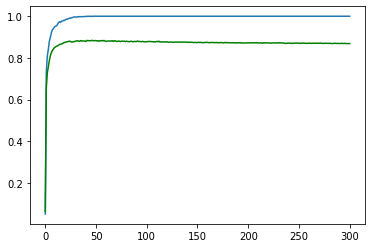

In [61]:
from matplotlib.pyplot import plot

# plot history and see generalization
plot(list(range(len(acc_history))), acc_history, '-')
plot(list(range(len(test_history))), test_history, 'g-')